<a href="https://colab.research.google.com/github/gulce0/IE-423/blob/main/Task7_Gulce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

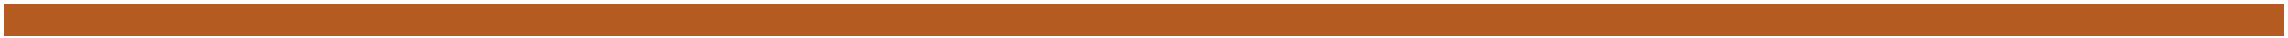

## <font color='#475468'> Bundling Recommendations:</font>
### <font color='#475468'> Can you bundle items that go together based on black friday sales data?</font>



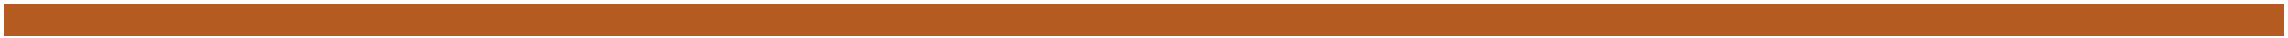

## Initialize

In [2]:
import pandas as pd

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Load Data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
dfBlc = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/blackfriday/train.csv', encoding = "ISO-8859-1")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
dfBlc.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


*We have 3 different measures: support, confidence, lift.*

***Support:*** *How frequently item set appears on the dataset. How likely is it for both items to show up together?*

***Confidence:*** *Strength of the association between two items.*

***Lift:*** *Strength of the association between two items with respect to expectation. If it is >1 we say that there is a strong relation. If it is <1 it is weaker than expected association. Confidence compared to D showing up anyway.*

## Prepare Data

In order to extract relationships between items, the data is first rearranged into a binary table where each transaction is a row, each column is an item, and the values are set to 1 if the item was part of the transaction.

In [6]:
# Replace spaces and remove characters
dfBlc['clean_productids'] = dfBlc['Product_ID']
dfBlc['clean_productids'] = dfBlc['clean_productids'].str.replace(" ", "_")
dfBlc['clean_productids'].str.replace('\W', '')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<>:4: DeprecationWarning: invalid escape sequence '\W'
<>:4: DeprecationWarning: invalid escape sequence '\W'
<ipython-input-6-189c910f0f3a>:4: DeprecationWarning: invalid escape sequence '\W'
  dfBlc['clean_productids'].str.replace('\W', '')


0         P00069042
1         P00248942
2         P00087842
3         P00085442
4         P00285442
            ...    
550063    P00372445
550064    P00375436
550065    P00375436
550066    P00375436
550067    P00371644
Name: clean_productids, Length: 550068, dtype: object

In [7]:
# Drop missing values
dfBlc.dropna(inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
# Convert to list format
dfBlcList=dfBlc.groupby('User_ID').clean_productids.apply(list)
dfBlcList

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


User_ID
1000001    [P00248942, P00085942, P00102642, P00110842, P...
1000002    [P00289342, P00034742, P00177442, P00116842, P...
1000003    [P00128042, P00112142, P00182742, P00110742, P...
1000004    [P00184942, P00046742, P00329542, P00114942, P...
1000005    [P00145042, P00324442, P00036842, P00173342, P...
                                 ...                        
1006036    [P00294442, P00118342, P00243942, P00156742, P...
1006037    [P00177442, P00087042, P00025442, P00086442, P...
1006038                    [P00034742, P00086042, P00109542]
1006039    [P00088542, P00254242, P00202742, P00085942, P...
1006040    [P00148642, P00059442, P00024142, P00192042, P...
Name: clean_productids, Length: 5870, dtype: object

Suppose we know what's already in the shopping cart, let's see if we can predict other items that the shopper may add.  This type of analysis is known as **Association Rule Mining** also commonly known as **Market Basket Analysis**.

## Build Model

### Association Rule Mining

Suppose we are interested in the relationship A -> B.  Then:

* **Support**: Fraction of transactions that contain both A and B = Freq(A,B)

* **Confidence**: How often B appears given A appeared = Support / Freq(A)

* **Lift**: Confidence given B appeared = Confidence / Freq(B)

*A-->D has a strong relation since it is greater than 1.*

In [9]:
# Encode data as transaction matrix
from mlxtend.preprocessing import TransactionEncoder

mdlBlcTe = TransactionEncoder()
mdlBlcTe_array = mdlBlcTe.fit(dfBlcList).transform(dfBlcList)
dfBlcb = pd.DataFrame(mdlBlcTe_array, columns=mdlBlcTe.columns_)
dfBlcb

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,P00000142,P00000242,P00000642,P00001042,P00001142,P00001542,P00002142,P00002242,P00003442,P00004242,...,P0096442,P0096542,P0096642,P0096742,P0096842,P0097342,P0099042,P0099742,P0099842,P0099942
0,True,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5865,False,False,True,False,True,False,False,False,True,False,...,False,True,False,True,False,True,False,False,False,False
5866,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5867,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5868,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


*This code is transforming the transaction data into a format suitable for market basket analysis or association rule mining. Each product in the transaction is represented by a column, and each row represents whether a product was included in a transaction. (True/False) indicate the presence or absence of the product in each transaction.*

In [10]:
# Ensure the DataFrame contains only boolean values
dfBlcb = dfBlcb.astype(bool)

# Check the DataFrame
print(dfBlcb.head())

   P00000142  P00000242  P00000642  P00001042  P00001142  P00001542  \
0       True      False      False      False      False      False   
1      False      False      False      False      False      False   
2      False      False      False      False      False      False   
3      False      False      False      False      False      False   
4      False      False      False      False      False      False   

   P00002142  P00002242  P00003442  P00004242  ...  P0096442  P0096542  \
0      False      False      False      False  ...     False      True   
1      False      False      False      False  ...     False     False   
2      False      False      False      False  ...     False     False   
3      False      False      False      False  ...     False     False   
4      False      False       True      False  ...     False     False   

   P0096642  P0096742  P0096842  P0097342  P0099042  P0099742  P0099842  \
0     False     False     False     False     False  

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [12]:
%%time
# Determine the items and itemsets with at least 1% support (generates all itemsets and then filters by support)
from mlxtend.frequent_patterns import apriori

frequent_itemsets = fpgrowth(dfBlcb, min_support=0.1, use_colnames=True)

# Display the frequent itemsets
print(frequent_itemsets)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


     support                itemsets
0   0.275128             (P00025442)
1   0.245315             (P00184942)
2   0.239523             (P00059442)
3   0.218228             (P00110842)
4   0.212266             (P00102642)
..       ...                     ...
82  0.101533  (P00110742, P00057642)
83  0.102555  (P00057642, P00046742)
84  0.102385  (P00057642, P00145042)
85  0.100511  (P00046742, P00145042)
86  0.103578  (P00057642, P00237542)

[87 rows x 2 columns]
CPU times: user 679 ms, sys: 5 ms, total: 684 ms
Wall time: 684 ms


In [13]:
!pip3 install mlxtend --upgrade

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 21.2 MB/s eta 0:00:00
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.22.0
    Uninstalling mlxtend-0.22.0:
      Successfully uninstalled mlxtend-0.22.0


In [16]:
%%time
# Speed up by using pattern fragment growth method for mining frequent itemsets (uses density to find good itemsets)

from mlxtend.frequent_patterns import fpgrowth

frequent_itemsets = fpgrowth(dfBlcb, min_support=0.1, use_colnames=True)
frequent_itemsets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


CPU times: user 1.87 s, sys: 19.9 ms, total: 1.89 s
Wall time: 2.96 s


,support,itemsets
0,0.275128,(P00025442)
1,0.245315,(P00184942)
2,0.239523,(P00059442)
3,0.218228,(P00110842)
4,0.212266,(P00102642)
...,...,...
82,0.101533,"(P00110742, P00057642)"
83,0.102555,"(P00057642, P00046742)"
84,0.102385,"(P00057642, P00145042)"
85,0.100511,"(P00046742, P00145042)"


In [18]:
# Evaluate the metrics, and filter the items and itemsets that have at least 70% confidence

from mlxtend.frequent_patterns import association_rules

a_rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)
a_rules = a_rules.sort_values(by=['confidence'],ascending=False)
a_rules.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


*It seems that there are no association rules meeting the 70% confidence threshold. This can happen if the frequent itemsets do not have strong enough associations to meet the specified confidence level. I want to try it again with lower threshold.*

In [22]:
# Evaluate the metrics, and filter the items and itemsets that have at least 50% confidence
a_rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
a_rules = a_rules.sort_values(by=['confidence'], ascending=False)
a_rules.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric


*It again did not show satisfying output. I need to look at frequent itemsets first.*

In [23]:
# Display the first few frequent itemsets
print(frequent_itemsets.head(20))

     support     itemsets
0   0.275128  (P00025442)
1   0.245315  (P00184942)
2   0.239523  (P00059442)
3   0.218228  (P00110842)
4   0.212266  (P00102642)
5   0.196252  (P00000142)
6   0.164055  (P00085942)
7   0.144804  (P00289942)
8   0.274617  (P00110742)
9   0.266099  (P00112142)
10  0.250426  (P00057642)
11  0.229983  (P00010742)
12  0.206985  (P00242742)
13  0.206474  (P00034742)
14  0.166780  (P00116842)
15  0.144293  (P00062842)
16  0.106303  (P00086042)
17  0.101874  (P00070342)
18  0.244974  (P00046742)
19  0.140204  (P00057742)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


*Now, i will try to generate association rules with a very low confidence threshold:*

In [24]:
# Evaluate the metrics, and filter the items and itemsets that have at least 1% confidence
a_rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.01)
a_rules = a_rules.sort_values(by=['confidence'], ascending=False)
print(a_rules.head(20))

    antecedents  consequents  antecedent support  consequent support  \
0   (P00110742)  (P00025442)            0.274617            0.275128   
1   (P00025442)  (P00110742)            0.275128            0.274617   
15  (P00237542)  (P00057642)            0.237479            0.250426   
11  (P00145042)  (P00057642)            0.239523            0.250426   
3   (P00112142)  (P00110742)            0.266099            0.274617   
13  (P00145042)  (P00046742)            0.239523            0.244974   
9   (P00046742)  (P00057642)            0.244974            0.250426   
2   (P00110742)  (P00112142)            0.274617            0.266099   
14  (P00057642)  (P00237542)            0.250426            0.237479   
12  (P00046742)  (P00145042)            0.244974            0.239523   
8   (P00057642)  (P00046742)            0.250426            0.244974   
10  (P00057642)  (P00145042)            0.250426            0.239523   
7   (P00057642)  (P00110742)            0.250426            0.27

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


***Interpretation of the output:***

*antecedents: The item on the left-hand side of the rule (e.g., the product that implies the presence of other product(s)).*

*consequents: The item on the right-hand side of the rule (e.g., the product that is likely to be bought together with the antecedent item(s)).*

For example or the first row: If product P00110742 is bought, P00025442 is likely to be bought. **27.46% **of transactions contain P00110742 and **27.51% **of transactions contain P00025442. **12.04%** of transactions contain both P00110742 and P00025442. **43.86% **of transactions containing P00110742 also contain P00025442. P00110742 and P00025442 are **1.59** times more likely to occur together than if they were independent.


utexas_ds_orie_divider_gray.png

## Takeaways

* Introduced association rule mining to recommend item bundles using *Market Basket Analysis*
* Evaluated item bundles using *Support*, *Confidence*, and *Lift* metrics

utexas_ds_orie_divider_gray.png